# East West Airlines Assignment

## Import Libraries

In [1]:
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sn

## Import Data

In [2]:
Airlines = pd.read_excel("EastWestAirlines.xlsx", sheet_name='data')
Airlines.head()

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1


In [3]:
Airlines.shape

(3999, 12)

In [4]:
Airlines.isnull().sum()

ID#                  0
Balance              0
Qual_miles           0
cc1_miles            0
cc2_miles            0
cc3_miles            0
Bonus_miles          0
Bonus_trans          0
Flight_miles_12mo    0
Flight_trans_12      0
Days_since_enroll    0
Award?               0
dtype: int64

In [5]:
Airlines.dtypes

ID#                  int64
Balance              int64
Qual_miles           int64
cc1_miles            int64
cc2_miles            int64
cc3_miles            int64
Bonus_miles          int64
Bonus_trans          int64
Flight_miles_12mo    int64
Flight_trans_12      int64
Days_since_enroll    int64
Award?               int64
dtype: object

In [6]:
Airlines.describe()

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
count,3999.000000,3.999000e+03,3999.000000,3999.000000,3999.000000,3999.000000,3999.000000,3999.00000,3999.000000,3999.000000,3999.00000,3999.000000
mean,2014.819455,7.360133e+04,144.114529,2.059515,1.014504,1.012253,17144.846212,11.60190,460.055764,1.373593,4118.55939,0.370343
std,1160.764358,1.007757e+05,773.663804,1.376919,0.147650,0.195241,24150.967826,9.60381,1400.209171,3.793172,2065.13454,0.482957
min,1.000000,0.000000e+00,0.000000,1.000000,1.000000,1.000000,0.000000,0.00000,0.000000,0.000000,2.00000,0.000000
25%,1010.500000,1.852750e+04,0.000000,1.000000,1.000000,1.000000,1250.000000,3.00000,0.000000,0.000000,2330.00000,0.000000
50%,2016.000000,4.309700e+04,0.000000,1.000000,1.000000,1.000000,7171.000000,12.00000,0.000000,0.000000,4096.00000,0.000000
75%,3020.500000,9.240400e+04,0.000000,3.000000,1.000000,1.000000,23800.500000,17.00000,311.000000,1.000000,5790.50000,1.000000
max,4021.000000,1.704838e+06,11148.000000,5.000000,3.000000,5.000000,263685.000000,86.00000,30817.000000,53.000000,8296.00000,1.000000


In [7]:
# Normalization function 
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_airline_df = scaler.fit_transform(Airlines)

In [8]:
scaled_airline_df

array([[-1.73512503e+00, -4.51140783e-01, -1.86298687e-01, ...,
        -3.62167870e-01,  1.39545434e+00, -7.66919299e-01],
       [-1.73426342e+00, -5.39456874e-01, -1.86298687e-01, ...,
        -3.62167870e-01,  1.37995704e+00, -7.66919299e-01],
       [-1.73340181e+00, -3.20031232e-01, -1.86298687e-01, ...,
        -3.62167870e-01,  1.41192021e+00, -7.66919299e-01],
       ...,
       [ 1.72682006e+00, -4.29480975e-05, -1.86298687e-01, ...,
        -3.62167870e-01, -1.31560393e+00,  1.30391816e+00],
       [ 1.72768167e+00, -1.85606976e-01, -1.86298687e-01, ...,
        -9.85033311e-02, -1.31608822e+00, -7.66919299e-01],
       [ 1.72854328e+00, -7.00507951e-01, -1.86298687e-01, ...,
        -3.62167870e-01, -1.31754109e+00, -7.66919299e-01]])

# Dendrogram

## Single Linkage

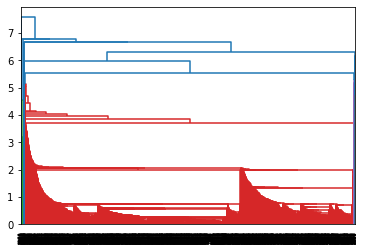

In [9]:
dendrogram = sch.dendrogram(sch.linkage(scaled_airline_df, method='single'))

## Average Linkage

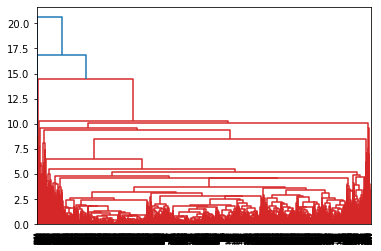

In [10]:
dendrogram = sch.dendrogram(sch.linkage(scaled_airline_df, method='average'))

## Complete Linkage

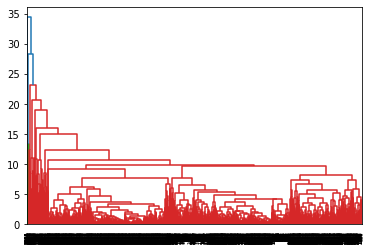

In [11]:
Dendogram = sch.dendrogram(sch.linkage(scaled_airline_df, method = 'complete'))

# Model Building

In [12]:
# create clusters
hc = AgglomerativeClustering(n_clusters=4, affinity = 'euclidean', linkage = 'single')

In [13]:
# save clusters for chart
y_hc = hc.fit_predict(scaled_airline_df)
Clusters=pd.DataFrame(y_hc,columns=['Clusters'])

In [14]:
Clusters

,Clusters
0,0
1,0
2,0
3,0
4,0
...,...
3994,0
3995,0
3996,0
3997,0


# K Means Clustering

In [2]:
Airlines_kmean = pd.read_excel("EastWestAirlines.xlsx", sheet_name='data')
Airlines_kmean.head()

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1


In [3]:
# Normalization function 
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_airline_df = scaler.fit_transform(Airlines_kmean)

In [4]:
scaled_airline_df

array([[-1.73512503e+00, -4.51140783e-01, -1.86298687e-01, ...,
        -3.62167870e-01,  1.39545434e+00, -7.66919299e-01],
       [-1.73426342e+00, -5.39456874e-01, -1.86298687e-01, ...,
        -3.62167870e-01,  1.37995704e+00, -7.66919299e-01],
       [-1.73340181e+00, -3.20031232e-01, -1.86298687e-01, ...,
        -3.62167870e-01,  1.41192021e+00, -7.66919299e-01],
       ...,
       [ 1.72682006e+00, -4.29480975e-05, -1.86298687e-01, ...,
        -3.62167870e-01, -1.31560393e+00,  1.30391816e+00],
       [ 1.72768167e+00, -1.85606976e-01, -1.86298687e-01, ...,
        -9.85033311e-02, -1.31608822e+00, -7.66919299e-01],
       [ 1.72854328e+00, -7.00507951e-01, -1.86298687e-01, ...,
        -3.62167870e-01, -1.31754109e+00, -7.66919299e-01]])

In [5]:
# How to find optimum number of  cluster
#The K-means algorithm aims to choose centroids that minimise the inertia, or within-cluster sum-of-squares criterion:

In [6]:
from sklearn.cluster import KMeans

In [7]:
wcss = []

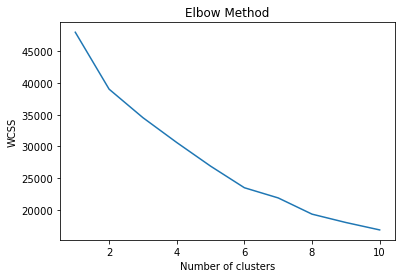

In [8]:
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i,random_state=0)
    kmeans.fit(scaled_airline_df)
    wcss.append(kmeans.inertia_)
    
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [9]:
wcss

[47987.99999999992,
 39018.847429544396,
 34529.16866611341,
 30616.623636092598,
 26894.753059893228,
 23490.749028769824,
 21885.368244869358,
 19330.69517630368,
 18015.300658980435,
 16846.161847375995]

In [10]:
#Build Cluster algorithm
clusters_new = KMeans(6, max_iter=500, algorithm='auto', random_state=42)
clusters_new.fit(scaled_airline_df)

KMeans(max_iter=500, n_clusters=6, random_state=42)

In [11]:
clusters_new.labels_

array([3, 3, 3, ..., 4, 0, 0])

In [12]:
#Assign clusters to the data set
Airlines_kmean['clusterid_new'] = clusters_new.labels_

In [13]:
#these are standardized values.
clusters_new.cluster_centers_

array([[ 9.76169813e-01, -3.89948720e-01, -3.84584142e-02,
        -7.18862168e-01,  2.67926240e-02, -6.27665798e-02,
        -5.74800090e-01, -6.28003452e-01, -1.95913300e-01,
        -2.19120335e-01, -9.71012962e-01, -4.51141516e-01],
       [-3.01522483e-01,  6.39719256e-01, -8.44329231e-02,
         1.02208440e+00, -9.82418871e-02,  1.56462993e+01,
         3.17969131e+00,  1.71461374e+00,  3.32926913e-02,
         5.96953922e-02,  2.39872612e-01,  3.37527346e-01],
       [-9.19213925e-01,  8.73539411e-01,  4.59338555e-02,
         1.52075683e+00, -8.70827294e-02, -6.27665798e-02,
         1.44273438e+00,  8.67701814e-01, -1.36474068e-02,
        -6.85058365e-03,  9.20663741e-01,  7.00066050e-01],
       [-8.21660921e-01, -1.64118348e-01, -3.59241362e-02,
        -5.26687037e-01,  3.18114006e-02, -5.86685627e-02,
        -4.71922161e-01, -3.92424630e-01, -1.52333836e-01,
        -1.63681205e-01,  8.00042790e-01, -2.05308180e-01],
       [ 5.48909201e-01, -5.85960944e-03, -7.8495929

In [14]:
Airlines_kmean.groupby('clusterid_new').agg(['mean']).reset_index()

,clusterid_new,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
,,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean
0,0,3146.243590,34314.820513,114.181090,1.069712,1.018429,1.000000,3265.075321,5.580929,186.212340,0.544071,2116.265224,0.153045
1,1,1664.866667,138061.400000,78.800000,3.466667,1.000000,4.066667,93927.866667,28.066667,506.666667,1.600000,4613.866667,0.533333
2,2,946.097682,162065.422185,178.884106,4.157285,1.001656,1.000000,52118.168874,19.956954,437.756623,1.336093,6023.408940,0.706954
3,3,1059.168935,57132.354684,116.417934,1.336269,1.019215,1.000801,5759.126501,7.831865,246.321857,0.751801,5773.989592,0.271417
4,4,2649.004065,72966.077236,84.521680,3.199187,1.005420,1.002710,26794.009485,17.752033,272.424119,0.827913,3030.032520,0.537940
5,5,1768.744828,181662.765517,805.551724,2.124138,1.041379,1.000000,31944.868966,28.089655,5701.103448,16.779310,4646.868966,0.820690


In [15]:
Airlines_kmean

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,clusterid_new
0,1,28143,0,1,1,1,174,1,0,0,7000,0,3
1,2,19244,0,1,1,1,215,2,0,0,6968,0,3
2,3,41354,0,1,1,1,4123,4,0,0,7034,0,3
3,4,14776,0,1,1,1,500,1,0,0,6952,0,3
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3994,4017,18476,0,1,1,1,8525,4,200,1,1403,1,0
3995,4018,64385,0,1,1,1,981,5,0,0,1395,1,0
3996,4019,73597,0,3,1,1,25447,8,0,0,1402,1,4
3997,4020,54899,0,1,1,1,500,1,500,1,1401,0,0


# DBSCAN Clustering

In [16]:
Airlines_dbscan = pd.read_excel("EastWestAirlines.xlsx", sheet_name='data')
Airlines_dbscan.head()

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1


In [18]:
# Normalization function 
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
DB_Scan = scaler.fit_transform(Airlines_dbscan)

In [19]:
DB_Scan

array([[-1.73512503e+00, -4.51140783e-01, -1.86298687e-01, ...,
        -3.62167870e-01,  1.39545434e+00, -7.66919299e-01],
       [-1.73426342e+00, -5.39456874e-01, -1.86298687e-01, ...,
        -3.62167870e-01,  1.37995704e+00, -7.66919299e-01],
       [-1.73340181e+00, -3.20031232e-01, -1.86298687e-01, ...,
        -3.62167870e-01,  1.41192021e+00, -7.66919299e-01],
       ...,
       [ 1.72682006e+00, -4.29480975e-05, -1.86298687e-01, ...,
        -3.62167870e-01, -1.31560393e+00,  1.30391816e+00],
       [ 1.72768167e+00, -1.85606976e-01, -1.86298687e-01, ...,
        -9.85033311e-02, -1.31608822e+00, -7.66919299e-01],
       [ 1.72854328e+00, -7.00507951e-01, -1.86298687e-01, ...,
        -3.62167870e-01, -1.31754109e+00, -7.66919299e-01]])

In [20]:
from sklearn.cluster import DBSCAN

In [21]:
dbscan1 = DBSCAN(eps=2, min_samples=7) # As value of epsilon increases, outliers decreases and min_samples = no.of columns+1
dbscan1.fit(DB_Scan)

DBSCAN(eps=2, min_samples=7)

In [22]:
#Noisy samples are given the label -1.
dbscan1.labels_

array([0, 0, 0, ..., 1, 0, 0], dtype=int64)

In [23]:
cl=pd.DataFrame(dbscan1.labels_,columns=['cluster'])

In [24]:
cl

,cluster
0,0
1,0
2,0
3,0
4,1
...,...
3994,1
3995,1
3996,1
3997,0


# Coclusion:- As compared to all three clustering methods, DBSCAN clustering method is more optimized with more number of clusters